In [59]:
import numpy as np
import matplotlib.pyplot as plt

In [60]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [61]:
def initialize_Parameters(inputFeatures, neuronsInHiddenLayers, outputFeatures):
    w1 = np.random.randn(neuronsInHiddenLayers, inputFeatures)
    w2 = np.random.randn(outputFeatures, neuronsInHiddenLayers)
    b1 = np.zeros((neuronsInHiddenLayers, 1))
    b2 = np.zeros((outputFeatures,1))


    parameters = {"w1":w1, "b1":b1, "w2":w2, "b2":b2}
    return parameters

In [62]:
def forward_Propagation(X, y, parameters):
    m = X.shape[1]
    w1 = parameters["w1"]
    w2 = parameters["w2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]

    Z1 = np.dot(w1,X)+b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(w2,A1)+b2
    A2 = sigmoid(Z2)
    

    cache = (Z1, A1, w1, b1, Z2, A2, w2, b2)
    logprobs = np.multiply(np.log(A2), y)+np.multiply(np.log(1-A2), (1-y))
    cost = -np.sum(logprobs)/m
    return cost, cache, A2

In [63]:
def backward_Propagation(X, y, cache):
    m = X.shape[1]
    (Z1, A1, w1, b1, Z2, A2, w2, b2) = cache
    dZ2 = A2 - y
    dw2 = np.dot(dZ2, A1.T)/m
    db2 = np.sum(dZ2, axis = 1, keepdims=True)

    dA1 = np.dot(w2.T, dZ2)
    dZ1 = np.multiply(dA1 , A1*(1-A1))
    dw1 = np.dot(dZ1 , X.T)/m
    db1 = np.sum(dZ1, axis=1, keepdims=True)/m

    gradients = {"dZ2": dZ2, "dw2":dw2, "db2":db2,
                 "dZ1": dZ1, "dw1":dw1, "db1":db1}
    return gradients

In [64]:
def update_Parameters(parameters, gradients, learningRate):
    parameters["w1"] = parameters["w1"] - learningRate*gradients["dw1"]
    parameters["w2"] = parameters["w2"] - learningRate*gradients["dw2"]
    parameters["b1"] = parameters["b1"] - learningRate*gradients["db1"]
    parameters["b2"] = parameters["b2"] - learningRate*gradients["db2"]
    return parameters

In [65]:
X = np.array([[0,0,1,1],[0,1,0,1]]) #xor input
y = np.array([[0,1,1,0]])#xor output

In [66]:
#define model paramters
neuronsInHiddenLayers = 2
inputFeatures = X.shape[0]
outputFeatures = y.shape[0]
parameters = initialize_Parameters(inputFeatures, neuronsInHiddenLayers, outputFeatures)
epoch = 100000
learningRate = 0.01
losses = np.zeros((epoch, 1))

for i in range(epoch):
    losses[i,0] , cache, A2 = forward_Propagation(X, y, parameters)
    gradients = backward_Propagation(X, y, cache)
    parameters = update_Parameters(parameters, gradients, learningRate)

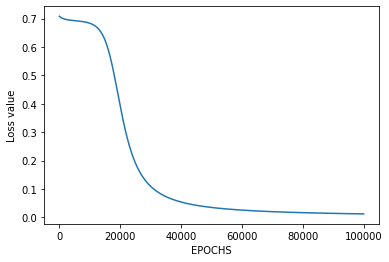

In [67]:
plt.figure()
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show()

In [68]:
X = np.array([[1, 1, 0, 0], [0, 1, 0, 1]]) # XOR input
cost, _, A2 = forward_Propagation(X, y, parameters)
prediction = (A2 > 0.5) * 1.0
# print(A2)
print(prediction)

[[1. 0. 0. 1.]]


In [69]:
import seaborn as sns